# 画图：不同模型不同切分

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
csv = pd.read_csv('/root/autodl-tmp/sfl/exp_data/diff_sp_ymx.csv')
# remove where 'model_name' is 'bert-large' or 'roberta-large'
csv = csv[~csv['model_name'].isin(['bert-large', 'roberta-large'])]
# # remove 'name=chatglm-20'
csv = csv[~csv['Name'].isin(['chatglm-20'])]
csv2 = pd.read_csv('/root/autodl-tmp/sfl/exp_data/diff_sp_cgz.csv')

# csv3 = pd.read_csv('/root/autodl-tmp/sfl/exp_data/diff_sp_qzh1.csv')
# combine the three csv
csv = pd.concat([csv, csv2])

In [10]:
# multiply client0_DRA_b2tr_rgLf_avg by 100
csv['client0_DRA_b2tr_rgLf_avg'] = csv['client0_DRA_b2tr_rgLf_avg'] * 100

/tmp/ipykernel_399633/2149471751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_csv['sp'] = model_csv['split_points'].apply(lambda x: int(x.split('-')[0]))
/tmp/ipykernel_399633/2149471751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_csv['sp'] = model_csv['split_points'].apply(lambda x: int(x.split('-')[0]))
/tmp/ipykernel_399633/2149471751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

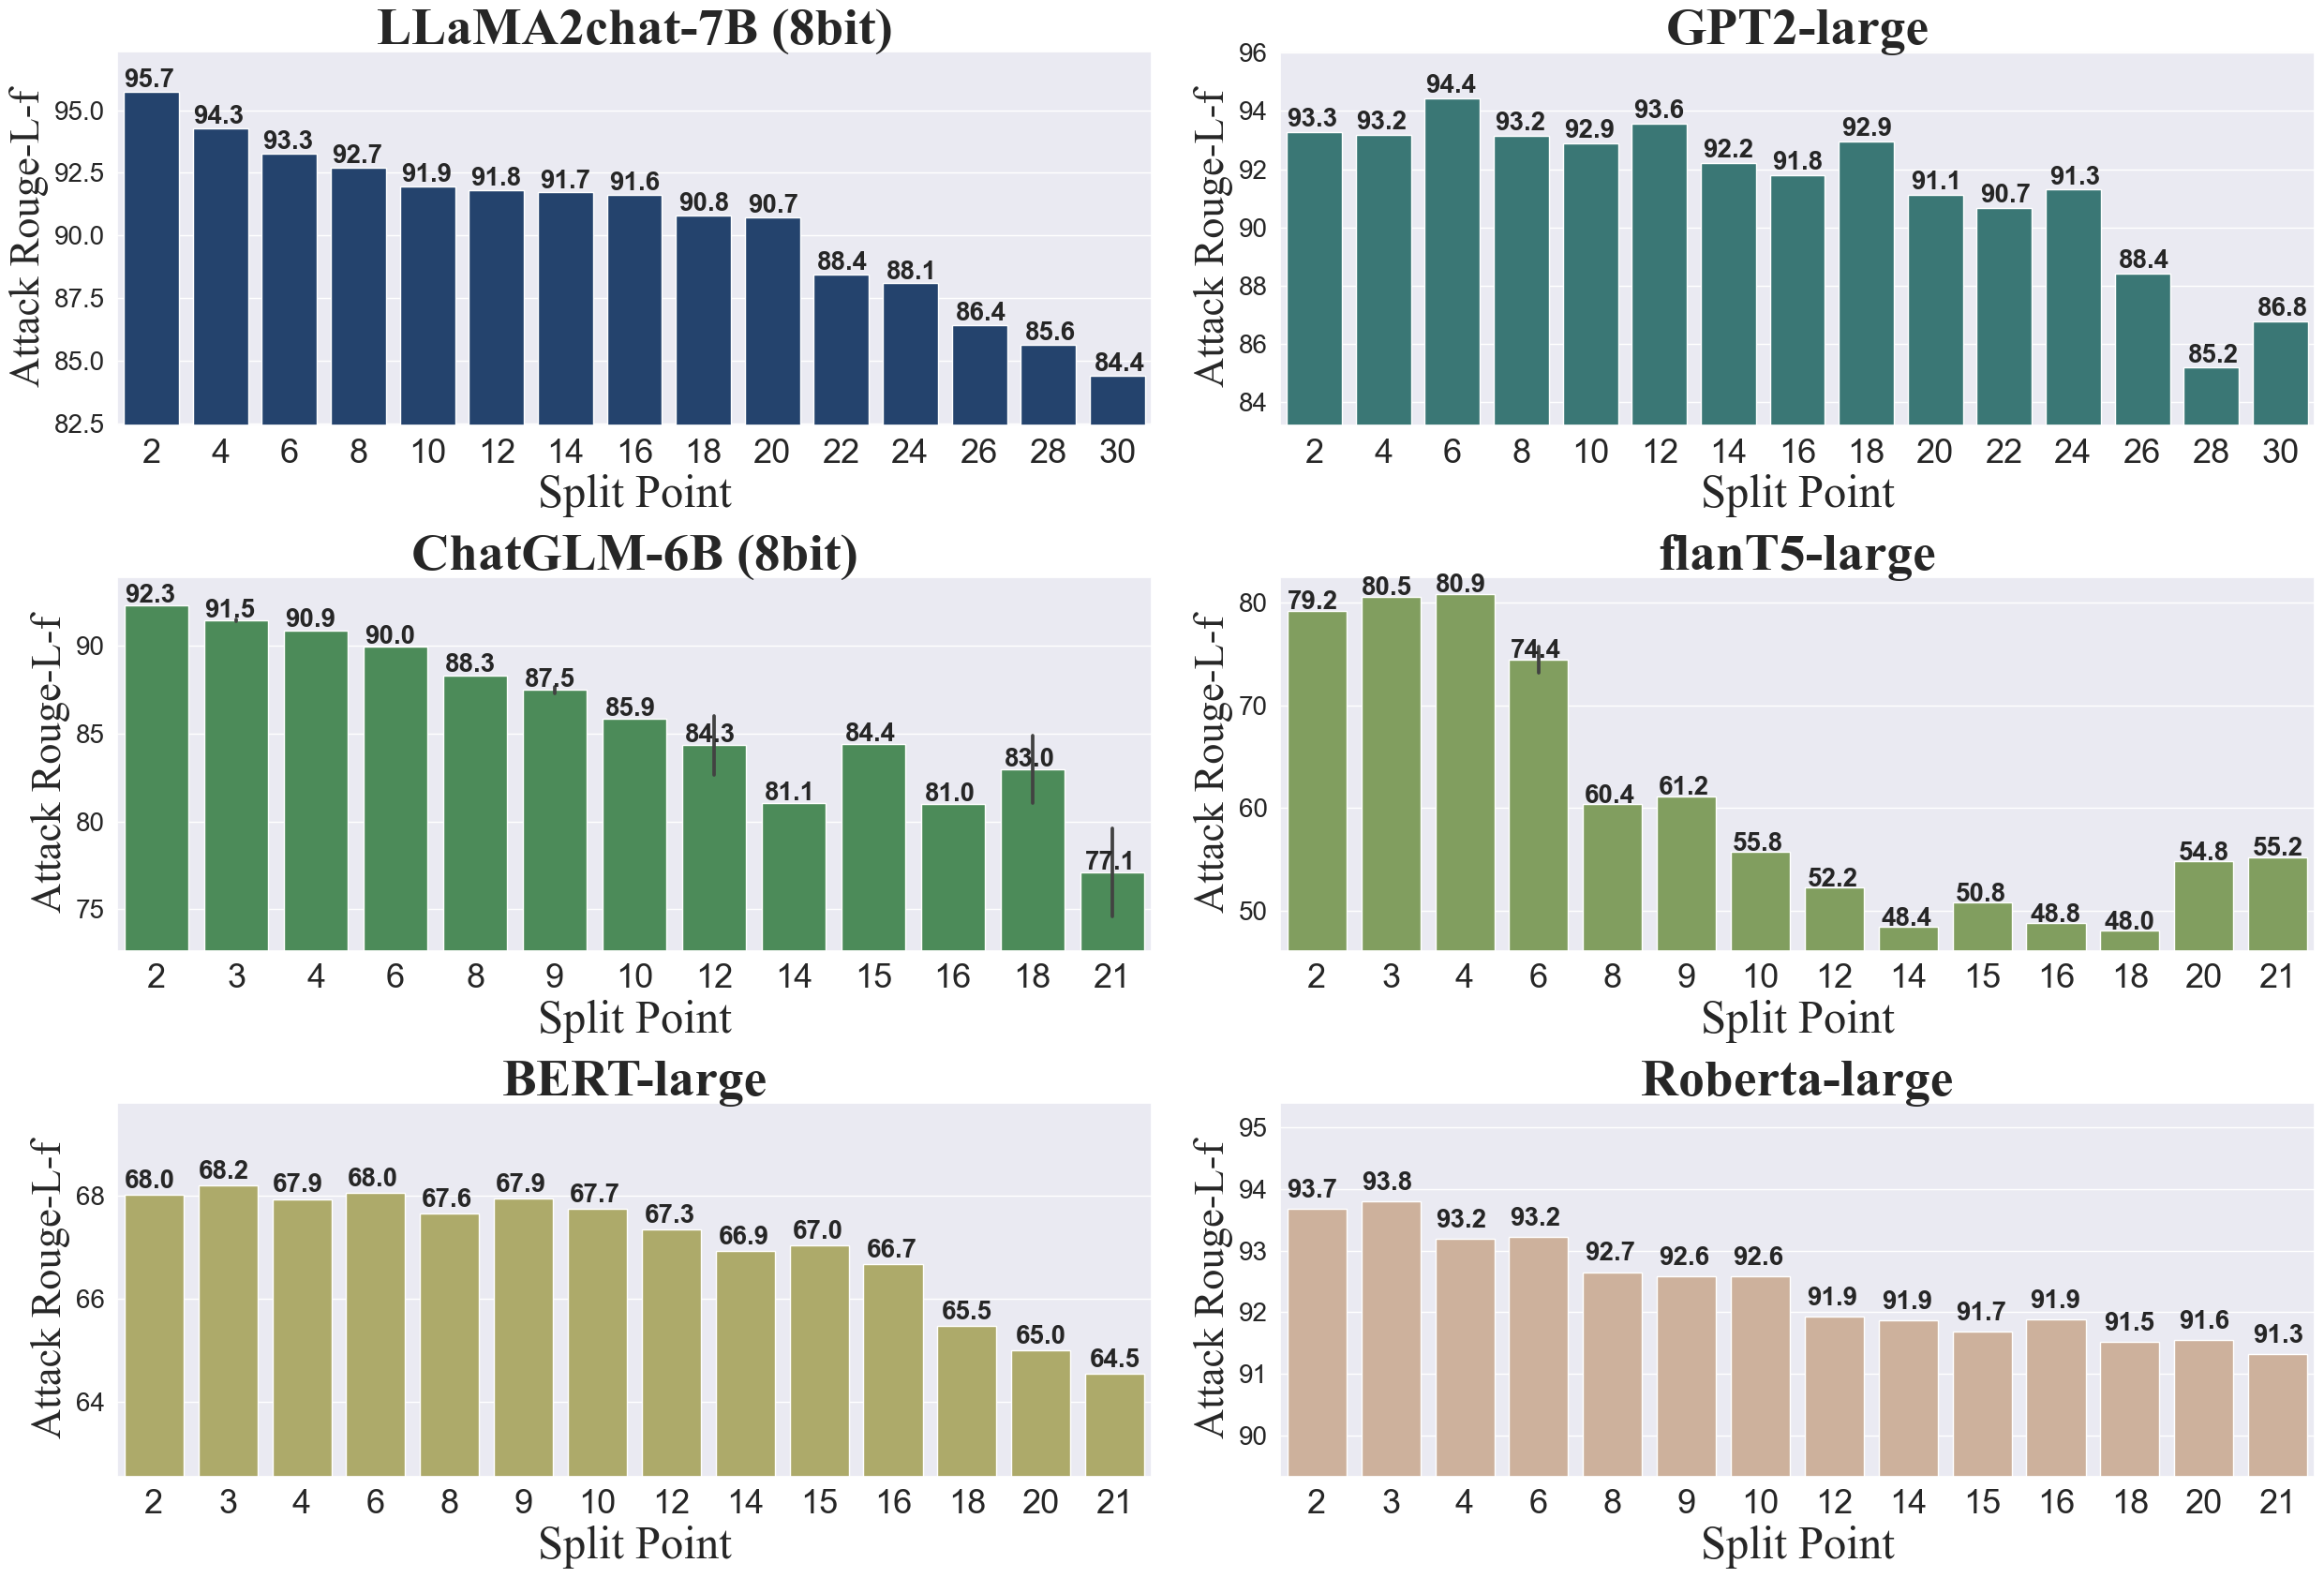

In [12]:
# model_names = csv['model_name'].unique()
model_names = ['llama2','gpt2-large', 'chatglm','flan-t5-large', 'bert-large', 'roberta-large']
model_show_names = ['LLaMA2chat-7B (8bit)','GPT2-large','ChatGLM-6B (8bit)', 'flanT5-large', 'BERT-large', 'Roberta-large']
# create a figure of subfigures 3*2
# use sns style
sns.set()
fig, axs = plt.subplots(3, 2, figsize=(25, 17))
# generate colors for each model_name, blue-based
colors = sns.color_palette("gist_earth", len(model_names))
# enlarge the margin between rows
plt.subplots_adjust(hspace=0.38, wspace=0.14)
for idx, (model_name,show_name) in enumerate(zip(model_names,model_show_names)):
    # make a figure for each model
    model_csv = csv[csv['model_name'] == model_name]
    # extract df['split_points'].split('-')[0] as x
    model_csv['sp'] = model_csv['split_points'].apply(lambda x: int(x.split('-')[0]))
    # use client0_DRA_b2tr_rgLf_avg as y
    model_csv = model_csv.sort_values(by='sp')
    # filter out odd sps
    if model_name == 'llama2' or model_name == 'gpt2-large':
        model_csv = model_csv[model_csv['sp'] % 2 == 0]
    # Bar plot on each subfigure
    sns.barplot(x='sp', y='client0_DRA_b2tr_rgLf_avg', data=model_csv, ax=axs[idx // 2, idx % 2], color=colors[idx])
    # set the min and max of y-axis as the min and max of the data + 0.1
    axs[idx // 2, idx % 2].set_ylim(model_csv['client0_DRA_b2tr_rgLf_avg'].min() - 2,
                                    model_csv['client0_DRA_b2tr_rgLf_avg'].max() + 1.6)
    # show the value of each bar
    for p in axs[idx // 2, idx % 2].patches:
        axs[idx // 2, idx % 2].annotate(str(round(p.get_height(), 1)), (p.get_x() * 1.005, p.get_height() * 1.002), fontsize=20, fontweight='bold')

    # add title to the subfigure, bold
    axs[idx // 2, idx % 2].set_title(show_name, fontsize=40, fontweight='bold',fontname='Times New Roman')
    # set the name of y-axis as DRA RougeL-f
    axs[idx // 2, idx % 2].set_ylabel('Attack Rouge-L-f', fontsize=32,fontname='Times New Roman')
    # set the name of x-axis as split points
    axs[idx // 2, idx % 2].set_xlabel('Split Point', fontsize=35, fontname='Times New Roman')
    axs[idx // 2, idx % 2].tick_params(axis='x', labelsize=26)
    axs[idx // 2, idx % 2].tick_params(axis='y', labelsize=20)

# eliminate the margin
plt.tight_layout()
# export the figure
plt.savefig('/root/autodl-tmp/sfl/exp_data/diff_sp.pdf', format='pdf')